In [3]:
import pandas as pd
df = pd.read_table("/content/Prac1.txt",delimiter=',')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [55]:
#Age must be iin range 0 to 150
def rules(df):
  novio = 0

  Agecheck = lambda x: x in range(151)
  test1 = df['Age'].apply(Agecheck).rename('Agecheck')
  print("Rule:The age should be in the range 0-150 ")
  for items in test1:
    if items == False:
      novio += 1
  print("No of violations:",novio)

  novio = 0
  Yearscheck = lambda x: x[0] > x[1]
  test2 = df[['Age','yearsmarried']].apply(Yearscheck, axis=1).rename('Yearscheck')
  print("Rule: Age should be greater than yearsmarried: ")
  for items in test2:
    if items == False:
      novio += 1
  print("No of violations:",novio)

  novio = 0
  statuscheck = lambda x: x in ('married','single','widowed')
  test3 = df['status'].apply(statuscheck).rename('statuscheck')
  print("Rule: Status should be married single or widowed ")
  for items in test3:
    if items == False:
      novio += 1
  print("No of violations:",novio)

  novio = 0
  Agegroupcheck = lambda x: (x[0] in range(18) and x[1]=='child') or (x[0] in range(18,65) and x[1]=='adult') or (x[0] in range(65,150) and x[1]=='elderly')
  test4 = df[['Age','agegroup']].apply(Agegroupcheck , axis=1).rename('Agegroupcheck')
  print("Rule: If age is less than 18 the age group should be child,if age is between 18 and 65 age group should be adult , otherwise elderly")
  for items in test4:
    if items == False:
      novio += 1
  print("No of violations:",novio)

  return pd.DataFrame([test1,test2,test3,test4])

In [60]:
test = []
Agecheck = lambda x: x in range(151)
test.append(df['Age'].apply(Agecheck).rename('Agecheck')) 

Agegroupcheck = lambda x: (x[0] in range(18) and x[1]=='child') or (x[0] in range(18,65) and x[1]=='adult') or (x[0] in range(65,150) and x[1]=='elderly')
test.append(df[['Age','agegroup']].apply(Agegroupcheck , axis=1).rename('Agegroupcheck'))

print(pd.DataFrame(test))
for items in test:
  novio = 0
  for j in items:
    if j == False:
      novio += 1
  print("No of violations:",novio)

                  0     1     2      3      4
Agecheck       True  True  True  False   True
Agegroupcheck  True  True  True  False  False
No of violations: 1
No of violations: 2


In [59]:
#Summarising the result
res = rules(df)
print("\n",res,"\n")
res.describe()

Rule:The age should be in the range 0-150 
No of violations: 1
Rule: Age should be greater than yearsmarried: 
No of violations: 1
Rule: Status should be married single or widowed 
No of violations: 0
Rule: If age is less than 18 the age group should be child,if age is between 18 and 65 age group should be adult , otherwise elderly
No of violations: 2

                   0     1      2      3      4
Agecheck       True  True   True  False   True
Yearscheck     True  True  False   True   True
statuscheck    True  True   True   True   True
Agegroupcheck  True  True   True  False  False 



,0,1,2,3,4
count,4,4,4,4,4
unique,1,1,2,2,2
top,True,True,True,True,True
freq,4,4,3,2,3


([<matplotlib.axis.YTick at 0x7f846fdb2908>,
 [Text(0, 0, 'False'), Text(0, 0, 'True')])

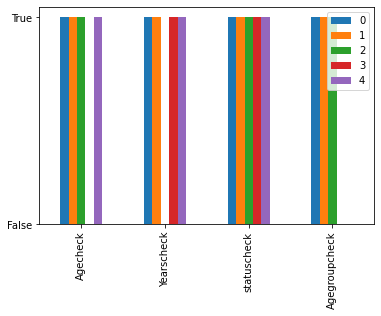

In [43]:
#Visualising the results
res = res.astype(int)
res.plot.bar()
plt.yticks([0,1],['False','True'])